Import Required python modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import pickle

In [2]:
dataset = pd.read_csv("../../Dataset/50_Startups_dataset.csv")
dataset

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04
5,5,131877.00,99814.81,362861.46,New York,156991.22
6,6,134615.56,147198.97,127716.92,California,156122.61
7,7,130298.23,145530.16,323876.78,Florida,155752.70
8,8,120542.62,148719.05,311613.39,New York,152211.87
9,9,123334.98,108679.27,304981.72,California,149760.06


In [5]:
dataset.columns

Index(['Unnamed: 0', 'R&D Spend', 'Administration', 'Marketing Spend', 'State',
       'Profit'],
      dtype='object')

In [7]:
dataset = dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State',
       'Profit']]
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.30,136897.90,471784.20,New York,192261.93
1,162597.80,151377.69,443898.63,California,191792.16
2,153441.61,101145.65,407934.64,Florida,191050.49
3,144372.51,118671.95,383199.72,New York,182902.09
4,142107.44,91391.87,366168.52,Florida,166188.04
5,131877.00,99814.81,362861.46,New York,156991.22
6,134615.56,147198.97,127716.92,California,156122.61
7,130298.23,145530.16,323876.78,Florida,155752.70
8,120542.62,148719.05,311613.39,New York,152211.87
9,123334.98,108679.27,304981.72,California,149760.06


OneHot encoding

In [10]:
dataset = pd.get_dummies(dataset,dtype = int, drop_first=True)
dataset

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.30,136897.90,471784.20,192261.93,0,1
1,162597.80,151377.69,443898.63,191792.16,0,0
2,153441.61,101145.65,407934.64,191050.49,1,0
3,144372.51,118671.95,383199.72,182902.09,0,1
4,142107.44,91391.87,366168.52,166188.04,1,0
5,131877.00,99814.81,362861.46,156991.22,0,1
6,134615.56,147198.97,127716.92,156122.61,0,0
7,130298.23,145530.16,323876.78,155752.70,1,0
8,120542.62,148719.05,311613.39,152211.87,0,1
9,123334.98,108679.27,304981.72,149760.06,0,0


In [12]:
dataset.shape
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.715600,121344.739600,211025.197800,112012.739200,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.471212,0.478518
min,0.100000,51283.240000,0.100000,14681.500000,0.000000,0.000000
25%,39936.470000,103730.975000,129300.232500,90139.002500,0.000000,0.000000
50%,73051.180000,122699.895000,212716.340000,107978.290000,0.000000,0.000000
75%,101602.900000,144842.280000,299469.185000,139766.077500,1.000000,1.000000
max,165349.300000,182645.660000,471784.200000,192261.930000,1.000000,1.000000


In [14]:
independent = dataset[['R&D Spend','Administration','Marketing Spend','State_Florida','State_New York']]
dependent = dataset[['Profit']]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [18]:
x_train,y_train,x_test,y_test

(    R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
 7   130298.23       145530.16        323876.78              1               0
 14  119943.34       156547.52        256513.02              1               0
 45    1000.33       124153.14          1904.03              0               1
 48     542.15        51743.25             0.10              0               1
 29   65605.58       153032.16        107138.48              0               1
 15  114523.71       122616.94        261776.33              0               1
 30   61994.58       115641.38         91131.34              1               0
 32   63408.96       129219.71         46085.35              0               0
 16   78013.21       121597.65        264346.16              0               0
 42   23641.03        96189.73        148001.21              0               0
 20   76253.96       113867.40        298664.57              0               0
 43   15505.83       127382.40         35534.27     

In [20]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

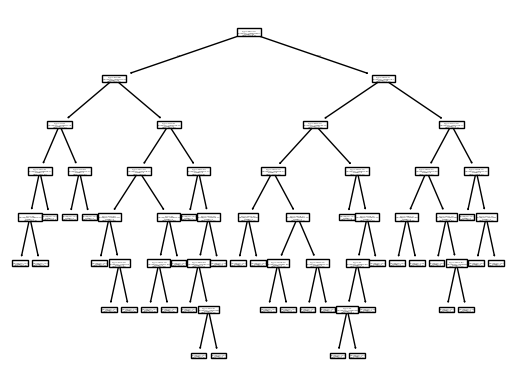

In [27]:
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [29]:
y_pred = regressor.predict(x_test)
y_pred

array([101004.74, 141585.62, 141585.62,  90708.29, 182902.09, 118474.13,
        71498.59,  99937.69, 118474.13, 156991.22, 107404.44,  89949.24,
       122776.96,  89949.24, 125370.47])

In [31]:
x_test

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
28,66051.62,182645.66,118148.30,1,0
11,100672.06,91790.71,249744.65,0,0
10,101913.18,110594.21,229161.05,1,0
41,27893.02,84710.87,164470.81,1,0
2,153441.61,101145.65,407934.64,1,0
27,72107.70,127864.65,353183.91,0,1
38,20229.69,65948.03,185265.20,0,1
31,61136.48,152702.02,88218.33,0,1
22,73994.66,122782.85,303319.36,1,0
4,142107.44,91391.87,366168.52,1,0


In [33]:
y_pred.shape

(15,)

In [37]:
r_score=r2_score(y_pred,y_test)
r_score

0.9017084444225297